In [ ]:
#The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. 
#The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import backend
import tensorflow as  tf

# Model architecture
from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D, Activation, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
# 
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data processing

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Progressor
#from tqdm import tqdm
#import h5py


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [111]:
from tensorflow.keras.optimizers import SGD

In [85]:
# loading the dataset 
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [86]:
y_train[0:1]

array([[6]], dtype=uint8)

In [87]:
type(y_train)

numpy.ndarray

In [88]:
#X_train1, X_test1 ,y_train1, y_test1 = train_test_split( X_train, y_train, test_size=0.20 ,stratify=True)
#y_train1, y_test1  = train_test_split( y_train, test_size=0.20 ,stratify=True)
#X, X_valid1, y, y_vaild1 = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
#X, X_valid1, y, y_vaild1 = train_test_split(X_train, test_size=0.2, random_state=1)
#y_train1, y_test1  = train_test_split( y_train, test_size=0.20 ,stratify=y_train)

In [89]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X_train,y_train, test_size=0.2, random_state=1,stratify=y_train)
#y_train1, y_test1  = train_test_split( y_train, test_size=0.20 ,stratify=y_train)

In [90]:
#Now i'am applying stratified sampling as :

#        train,test = train_test_split(dataset,test_size=0.20,stratify=True)
#s = pd.Series(data) 

In [91]:
# X_train and y_train to put into another numpy 3 arrays such ,X_train to spilt into train1 , test1 and val1 .
# checking if after splitting data it has correctly loaded into three arrays or not.


In [92]:
#X_train1= X_train[:40000,:]
#X_test1 = X_train[-10000:,:]
#X_train1= X_train[:40000,:]
#X_test1 = X_train[-10000:,:]

In [93]:
#y_train1= y_train[:40000,:]
#y_test1 = y_train[-10000:,:]

In [94]:
# summarize loaded dataset
print('X_train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('X_train1: X=%s, y=%s' % (X_train1.shape, y_train1.shape))
print('X_test1: X=%s, y=%s' % (X_test1.shape, y_test1.shape))

X_train: X=(50000, 32, 32, 3), y=(50000, 1)
X_train1: X=(40000, 32, 32, 3), y=(40000, 1)
X_test1: X=(10000, 32, 32, 3), y=(10000, 1)


In [95]:
X_test1[0]

array([[[174, 174, 228],
        [174, 174, 228],
        [176, 175, 232],
        ...,
        [178, 180, 237],
        [177, 179, 236],
        [178, 179, 235]],

       [[179, 180, 230],
        [179, 179, 230],
        [181, 181, 234],
        ...,
        [183, 184, 243],
        [181, 184, 240],
        [182, 183, 239]],

       [[179, 180, 226],
        [179, 180, 227],
        [181, 182, 230],
        ...,
        [183, 185, 241],
        [181, 183, 237],
        [181, 183, 236]],

       ...,

       [[146, 146, 164],
        [145, 144, 162],
        [146, 145, 164],
        ...,
        [133, 117,  91],
        [132, 115,  88],
        [125, 108,  80]],

       [[145, 144, 162],
        [143, 142, 160],
        [144, 143, 161],
        ...,
        [133, 119,  96],
        [133, 117,  94],
        [126, 111,  88]],

       [[135, 134, 152],
        [133, 132, 150],
        [135, 134, 151],
        ...,
        [128, 118, 100],
        [129, 118, 100],
        [123, 112,  96]]

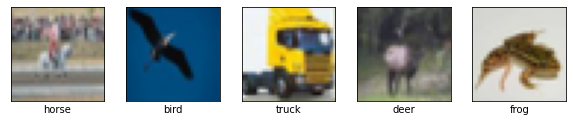

In [96]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train1[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train1[i][0]])
plt.show()

In [60]:
y_test[0:2]

array([[3],
       [8]], dtype=uint8)

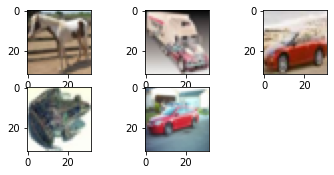

In [46]:
# plot first few images
for i in range(5):
# define subplot
   plt.subplot(330 + 1 + i)
# plot raw pixel data
   plt.imshow(X_train1[i])
# show the figure
plt.show()

In [ ]:
# normalize pixel values
#X_train1, X_test1 = X_train1 / 255.0, X_test1 / 255.0
# Function to reshape and scaling image
def Scale_Reshape(x):
    x_min = x.min(axis=(1, 2), keepdims=True)
    x_max = x.max(axis=(1, 2), keepdims=True)

    x = (x - x_min)/(x_max-x_min)
    
    x = x.reshape(-1, 32, 32, 3)
    return x

In [ ]:
# Training data processing
X_train1_scale = Scale_Reshape(X_train1)

# Test data processing 
X_test1_scale = Scale_Reshape(X_test1)
#  actual test data scaling
# Test data processing 
X_test_scale = Scale_Reshape(X_test)

Text(0.5, 0, 'Classes')

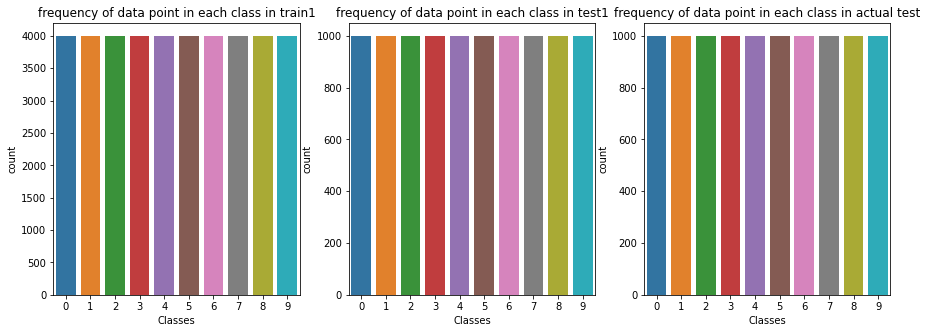

In [97]:
# Show the histogram showing the frequency of data point in each class
# it shows in training set each class having 5k images  and test each class having 1k 
fig, axs = plt.subplots(1,3,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train1.ravel(), ax=axs[0])
axs[0].set_title('frequency of data point in each class in train1')
axs[0].set_xlabel('Classes')

sns.countplot(y_test1.ravel(), ax=axs[1])
axs[1].set_title('frequency of data point in each class in test1')
axs[1].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[2])
axs[2].set_title('frequency of data point in each class in actual test')
axs[2].set_xlabel('Classes')

Text(0.5, 0, 'Classes')

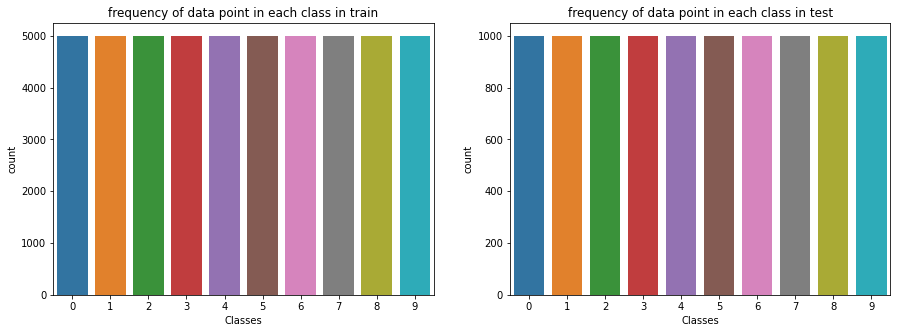

In [98]:
# it shows in training set each class having 5k images  and test each class having 1k 
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('frequency of data point in each class in train')
axs[0].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('frequency of data point in each class in test')
axs[1].set_xlabel('Classes')



In [99]:
# normalize pixel values
X_train1, X_test1 = X_train1 / 255.0, X_test1 / 255.0

In [100]:
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_train1 = tf.keras.utils.to_categorical(y_train1, num_classes)
y_test1 = tf.keras.utils.to_categorical(y_test1, num_classes)

In [101]:
# now we will check with actuall test set for accuracy ( X_test and y_test)
# here one hot encoding for actual test data and scaling for actual test set 
# normalize pixel values
X_test=  X_test / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [130]:
y_test1[0:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#net is learning with 32 convolutional filters, each of which with a 3 x 3 size. 
#activation is relu and we have a max-pooling operation with pool size 2 x 2 and a dropout at 25%.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.50))


In [ ]:
#net is learning 128 convolutional filters, each of which with a 3 x 3 size.  
#folowed by another 128 convolutional filters, each of which with a 3 x 3 size and activation is also relu. 
#After that we have a avarage -pooling operation with pool size 2 x 2 and a dropout at 25%.

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
#model.add(Dropout(0.50))


In [ ]:
# Add Dense layers on top
# CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs,drop out  and a softmax activation.

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.50))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

In [75]:
number_of_round=60 ,
#batch_size = 32

In [129]:
# Compile and train the model and validation dataset and without any image augmentation
#opt = SGD(lr=0.01, momentum=0.9)
#optimizer=opt
model.compile(optimizer= 'adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

#history = model.fit(X_train1, y_train1, epochs = 40, shuffle = True, batch_size = 64,
#                    validation_data=(X_test1, y_test1))
history = model.fit(X_train1, y_train1, epochs = 35, shuffle = True, batch_size = 64,
                     validation_split = 0.1)

Epoch 1/60
 56/563 [=>............................] - ETA: 7s - loss: 0.4674 - accuracy: 0.8340

KeyboardInterrupt: ignored

In [114]:
# with test1 dataset 
history = model.fit(X_train1, y_train1, epochs = 60, shuffle = True, batch_size = 64,
                   validation_data=(X_test1, y_test1))

Epoch 1/60
625/625 [==============================] - 12s 19ms/step - loss: 0.2188 - accuracy: 0.9368 - val_loss: 0.8016 - val_accuracy: 0.7796
Epoch 2/60
625/625 [==============================] - 12s 19ms/step - loss: 0.1631 - accuracy: 0.9485 - val_loss: 0.8595 - val_accuracy: 0.7802
Epoch 3/60
625/625 [==============================] - 12s 19ms/step - loss: 0.1454 - accuracy: 0.9535 - val_loss: 0.9066 - val_accuracy: 0.7821
Epoch 4/60
625/625 [==============================] - 12s 19ms/step - loss: 0.1356 - accuracy: 0.9553 - val_loss: 0.9301 - val_accuracy: 0.7747
Epoch 5/60
625/625 [==============================] - 12s 19ms/step - loss: 0.1266 - accuracy: 0.9577 - val_loss: 0.9703 - val_accuracy: 0.7804
Epoch 6/60
625/625 [==============================] - 12s 18ms/step - loss: 0.1178 - accuracy: 0.9599 - val_loss: 1.0107 - val_accuracy: 0.7764
Epoch 7/60
625/625 [==============================] - 12s 18ms/step - loss: 0.1169 - accuracy: 0.9606 - val_loss: 0.9936 - val_accuracy:

In [116]:
# with actaul test dataset
history = model.fit(X_train1, y_train1, epochs = 60, shuffle = True, batch_size = 64,
                   validation_data=(X_test, y_test))

Epoch 1/60
625/625 [==============================] - 12s 19ms/step - loss: 0.0578 - accuracy: 0.9800 - val_loss: 1.3492 - val_accuracy: 0.7723
Epoch 2/60
625/625 [==============================] - 12s 19ms/step - loss: 0.0561 - accuracy: 0.9810 - val_loss: 1.3354 - val_accuracy: 0.7751
Epoch 3/60
625/625 [==============================] - 12s 18ms/step - loss: 0.0519 - accuracy: 0.9831 - val_loss: 1.3137 - val_accuracy: 0.7750
Epoch 4/60
625/625 [==============================] - 12s 18ms/step - loss: 0.0491 - accuracy: 0.9834 - val_loss: 1.2999 - val_accuracy: 0.7746
Epoch 5/60
625/625 [==============================] - 12s 18ms/step - loss: 0.0527 - accuracy: 0.9830 - val_loss: 1.3595 - val_accuracy: 0.7717
Epoch 6/60
625/625 [==============================] - 11s 18ms/step - loss: 0.0470 - accuracy: 0.9846 - val_loss: 1.3953 - val_accuracy: 0.7770
Epoch 7/60
625/625 [==============================] - 12s 19ms/step - loss: 0.0501 - accuracy: 0.9832 - val_loss: 1.3888 - val_accuracy:

In [36]:
# Evaluate the model
test_loss1, test_acc1 = model.evaluate(X_test1,  y_test1, verbose=2)

313/313 - 2s - loss: 1.3974 - accuracy: 0.7678


In [37]:
predicted_classes = model.predict_classes(X_test1) 
predicted_classes

array([1, 8, 5, ..., 9, 1, 1])

In [119]:
# plotting model train and test accuracy 
def plotmodel(hist): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train1', 'Test1'], loc='upper left')
    # loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train1', 'Test1'], loc='upper left')
    plt.show()

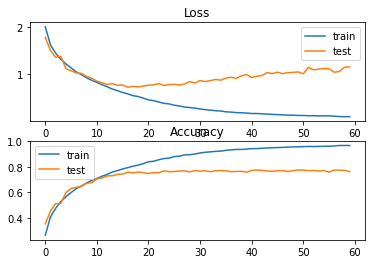

In [113]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation dataset')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation dataset')
plt.legend()
plt.show()

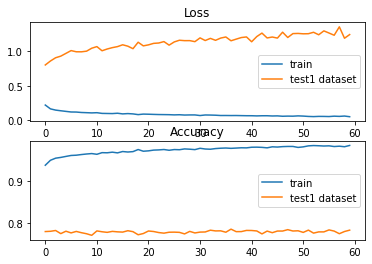

In [115]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test1 dataset')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test1 dataset')
plt.legend()
plt.show()

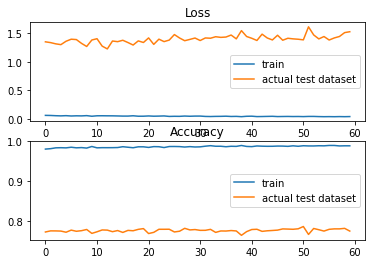

In [118]:
 # plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='actual test dataset')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='actual test dataset')
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


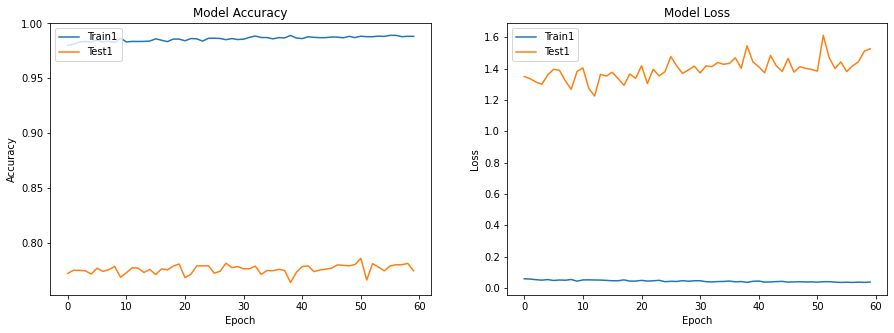

In [120]:
# printing , below graph shows overfitting train accuracy good but test accuracy down ,difference is there 
print(history.history.keys())

plotmodel(history)

In [ ]:
# MODEL Training using data augmentaion 

In [121]:
# generating more data using the existing data
#Randomly Zoom by 10% some training images
#Randomly shift images horizontally by 10% of the width
#Randomly shift images vertically by 10% of the height
#Randomly flip images horizontally.
#from tf.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zca_epsilon=0,
                            #width_shift_range = 0.1,
                            horizontal_flip = True,
                            fill_mode='reflect',
                            )
    
#datagen.fit(X_train1)



In [ ]:
test_generator = ImageDataGenerator(zca_epsilon=0,
                               horizontal_flip=True,
                               fill_mode='reflect',)
#test_generator.fit(X_test1, seed=0, augment=True)

In [122]:
# retraining the model

#history = model.fit_generator(datagen.flow(X_train1, y_train1, batch_size = 32), epochs = 10, validation_data=(X_test1, y_test1))
#                                    workers=4)
# get batch iterator for training
train_iterator = datagen.flow(X_train1, y_train1)
# get batch iterator for test1
val_iterator = datagen.flow(X_test1, y_test1)
# fit model
history = model.fit_generator(train_iterator, validation_data=val_iterator, epochs = 20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.5574 - accuracy: 0.8295 - val_loss: 0.8375 - val_accuracy: 0.7416
Epoch 2/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.4740 - accuracy: 0.8487 - val_loss: 0.8157 - val_accuracy: 0.7535
Epoch 3/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.4476 - accuracy: 0.8544 - val_loss: 0.8013 - val_accuracy: 0.7620
Epoch 4/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.4335 - accuracy: 0.8607 - val_loss: 0.7267 - val_accuracy: 0.7799
Epoch 5/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.4038 - accuracy: 0.8670 - val_loss: 0.7938 - val_accuracy: 0.7739
Epoch 6/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.4033 - accuracy: 0.8658 - val_loss: 0.8307 - val_accuracy: 0.7569
Epoch 7/20
1250/1250 [==========================

KeyboardInterrupt: ignored

In [ ]:
# Evaluate the model for test data
#test_loss, test_acc = model.evaluate(X_test1,  y_test1, verbose=2)
# get batch iterator for testing
test_iterator = datagen.flow(X_test, y_test)
# evaluate model loss on test dataset
test_loss, test_acc = model.evaluate_generator(test_iterator, verbose=2)

313/313 - 5s - loss: 0.7641 - acc: 0.7682


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


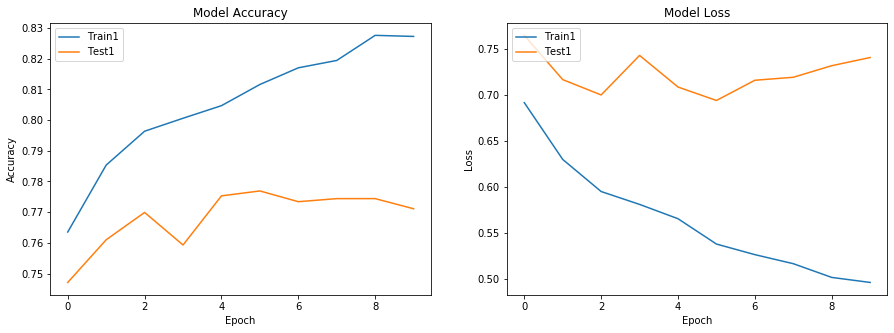

In [ ]:
# printing , below graph shows overfitting train accuracy good but test accuracy down ,difference is there 
print(history.history.keys())

plotmodel(history)